# Assignment_1

## 1.Feedforward: Building a ReLu 2 Layer neural network

### 1.Plot (draw) a network with: 
2 inputs, 2 hidden layers (where the first layer contains 3 hidden units and the second contains 2 hidden units) and a 3-class output (use a softmax function)

<img src="fig1.png" style="width:600px;height:400px;">

### 2.Write out the mathematical equation for this network


$$h_1 = W_1X + B_1$$
$$a_1 = ReLU(h_1)$$
$$h_2 = W_2a_1 + B_2$$
$$a_2 = ReLU(h_2)$$
$$Output = softmax(Va_2 + C)$$


### 3.Write out the function in python, call it ff_nn_2_ReLu(...)

In [1]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import division
import random
import pandas as pd

In [2]:
# --- Activation Functions(taken from example)  ----

ReLU = np.vectorize(lambda z: np.fmax(0,z))

In [3]:
# --- Softmax Function(taken from example) ----

softmax = lambda z: np.exp(z)/(np.sum(np.exp(z),axis=1))[:,np.newaxis]

In [4]:
# --- Forward Propagation ----

def ff_nn_2_ReLu(X,parameters):
     
    W1, B1, W2, B2, V, C = parameters
    
    # Forward pass
    a1 = W1.dot(X) + B1
    H1 = ReLU(a1)
    a2 = W2.dot(H1) + B2
    H2 = ReLU(a2)
    a3 = V.dot(H2) + C
    a3 = np.transpose(a3)
    Y_hat = softmax(a3)
    
    return Y_hat

### 4.Suppose you have the following set of weight matrices, what are the class probabilities associated with the forward pass of each sample?

In [5]:
# --- 2 Layer neural network ----

W1 = np.array([[1,0],[-1,0],[0,0.5]])
B1 = np.array([0,0,1]).reshape(3,1)
W2 = np.array([[1,0,0],[-1,-1,0]])
B2 = np.array([1,-1]).reshape(2,1)
V = np.array([[1,1],[0,0],[-1,-1]])
C = np.array([1,0,0]).reshape(3,1)
X = np.array([[1,0,0],[-1,-1,1]])
parameters = [W1, B1, W2, B2, V, C]

ff_nn_2_ReLu(X,parameters)

array([[0.94649912, 0.04712342, 0.00637746],
       [0.84379473, 0.1141952 , 0.04201007],
       [0.84379473, 0.1141952 , 0.04201007]])

## 2.Gradient Descent
The Rosenbrock function is a famous non-convex function that is used to ex- plore optimization algorithms. This simple 2-D function has some very tricky structure.

### 1.What are the partial derivatives of f with respect to x and to y?

$$\frac{df}{dx} = -2(1-x) + 200(y-x^2)(-2x)$$
$$\frac{df}{dy} = 200(y-x^2)$$

### 2.Create a visualization of the contours of the Rosenbrock function.

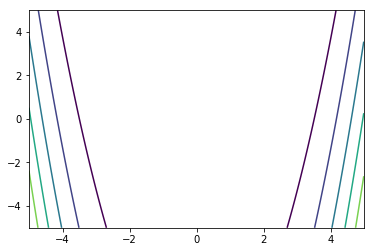

In [6]:
###########################
# The Rosenbrock function #
###########################

def rosenbrock(x,y):
    return (1-x)**2+100*(y-x**2)**2

delta = 0.025
x = np.arange(-5.0, 5.0, delta)
y = np.arange(-5.0, 5.0, delta)
X, Y = np.meshgrid(x, y)
Z = rosenbrock(X,Y)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)

### 3.Write a Gradient Descent algorithm for finding the minimum of the function. Visualize your results with a few different learning rates.

In [7]:
# --- Defining gradient ----

def grad_f(vector):
    x, y = vector
    df_dx = 400*x**3-400*x*y-2*x-2 
    df_dy = 200*(y-x**2)
    return np.array([df_dx, df_dy])

In [8]:
# --- Compute the gradient ---

def grad_descent(starting_point=None, iterations=50, learning_rate=0.005):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-1,1,size=2)
    trajectory = [point]
    
    for i in range(iterations):
        grad = grad_f(point)
        point = point - learning_rate * grad
        trajectory.append(point)
    return np.array(trajectory)

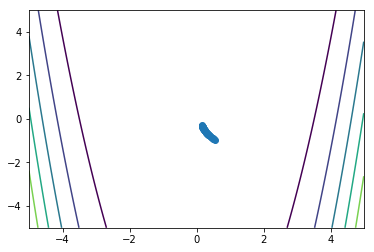

In [9]:
# --- Visualize Trajectory with learning rate = 0.0001---

np.random.seed(10)
traj = grad_descent(learning_rate=0.0001)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')


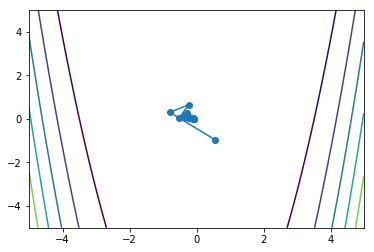

In [10]:
# --- Visualize Trajectory with learning rate = 0.005---

np.random.seed(10)
traj = grad_descent()

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')


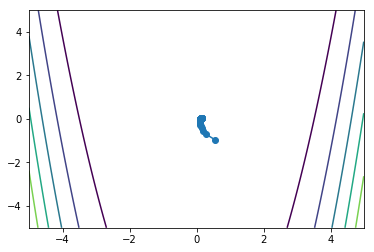

In [11]:
# --- Visualize Trajectory with learning rate = 0.001---

np.random.seed(10)
traj = grad_descent(learning_rate=0.001)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')


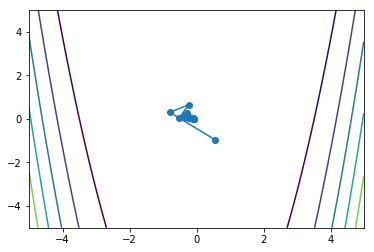

In [12]:
# --- Visualize Trajectory with learning rate = 0.0001---

np.random.seed(10)
traj = grad_descent(learning_rate=0.005)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')


### 4.Write a Gradient Descent With Momentum algorithm for finding the mini- mum. Visualize your results with a few different settings of the algorithm’s hyperparameters.

In [13]:
# --- Compute the gradient with momentum ---

def grad_descent_with_momentum(starting_point=None, iterations=10, alpha=.9, epsilon=10):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-1,1,size=2)
    trajectory = [point]
    v = np.zeros(point.size)
    
    for i in range(iterations):
        grad = grad_f(point)
        v = alpha*v + epsilon*grad
        point = point - v
        trajectory.append(point)
    return np.array(trajectory)
    

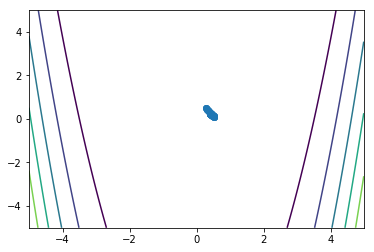

In [14]:
# --- Visualizing trajectory with alpha = .9 and epsilon = 0.0001--

traj = grad_descent_with_momentum(iterations=50, epsilon=0.0001, alpha=.9)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

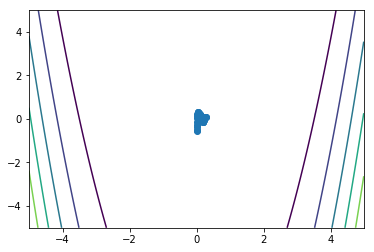

In [15]:
# --- Visualizing trajectory with alpha = .9 and epsilon = 0.0005--

traj = grad_descent_with_momentum(iterations=50, epsilon=0.0005, alpha=.9)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

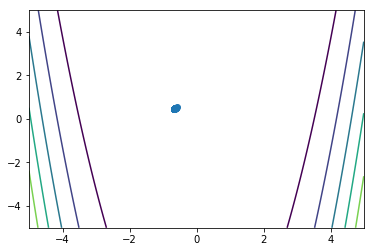

In [16]:
# --- Visualizing trajectory with alpha = .5 and epsilon = 0.0001--

traj = grad_descent_with_momentum(iterations=50, epsilon=0.0001, alpha=.5)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

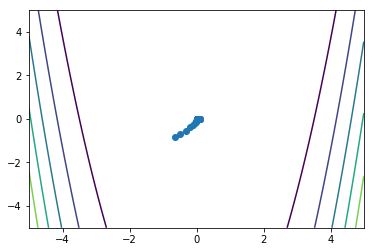

In [17]:
# --- Visualizing trajectory with alpha = .5 and epsilon = 0.0005--

traj = grad_descent_with_momentum(iterations=50, epsilon=0.0005, alpha=.5)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

## 3.Backprop

### 1.For the same network as in Number 1, derive expressions of the gradient of the Loss function with respect to each of the model parameters.

For the network with cross-entropy as the loss funciton.
$$h_1 = W_1X + B_1$$
$$a_1 = ReLU(h_1)$$
$$h_2 = W_2a_1 + B_2$$
$$a_2 = ReLU(h_2)$$
$$Output = softmax(Va_2 + C)$$
$$L(y,\hat{y}) = - \sum\limits_{i = 1}^{3} y_ilog\hat{y}$$

The derive expressions of the gradient of the Loss function are:
$$\frac{dL}{dC} = \sum\limits_{i = 1}^{3} (y_i - \hat{y})$$
$$\frac{dL}{dV} =  (y_i - \hat{y})a_2$$
$$\frac{dL}{dB_2} = \sum\limits_{i = 1}^{3} (V^T(y_i - \hat{y}))a_2 * (h_2 > 0)$$
$$\frac{dL}{dW_2} = ((V^T(y_i - \hat{y}))a_2)a_1 * (h_2 > 0)$$
$$\frac{dL}{dB_1} = \sum\limits_{i = 1}^{3} W_2 ((V^T(y_i - \hat{y}))a_2) * (h_2 > 0) * (h_1 > 0)$$
$$\frac{dL}{dW_1} = ((W_2(V^T(y_i - \hat{y}))a_2)a_1)X * (h_2 > 0) * (h_1 > 0)$$

### 2.Write a function grad_f(...) that takes in a weights vector and returns the gradient of the Loss at that location.

In [368]:
def grad_f(X,Y,parameters):
    
    W1, B1, W2, B2, V, C = parameters
    
    h1 = ReLU(np.dot(X, W1) + B1)      
    h2 = ReLU(np.dot(h1, W2) + B2)
    scores = np.dot(h2, V) + C
    scores = softmax(scores)
    
    N,_ = X.shape
    reg = 1e-4
    labels = list(Y.argmax(axis=1))
    
    loss = (-np.sum(np.log(scores[range(N), labels]))) / N
    loss += 0.5 * reg * (np.sum(W1 * W1) + np.sum(W2 * W2))
    
    # Grads
    dscores = scores.copy()
    dscores[range(N), labels] -= 1
    dscores /= N
    
    d_V = h2.T.dot(dscores) + reg * V    
    d_C = np.sum(dscores, axis=0)

    d_h2 = dscores.dot(V.T)
    d_h2[d_h2 < 0] = 0
    
    d_W2 = h1.T.dot(d_h2) + reg * W2
    d_B2 = np.sum(d_h2, axis=0)
    
    d_h1 = d_h2.dot(W2.T)
    d_h1[d_h1 < 0] = 0
    
    d_W1 = X.T.dot(d_h1) + reg * W1
    d_B1 = np.sum(d_h1, axis=0)
    
    grads = [d_W1, d_B1, d_W2, d_B2, d_V, d_C]
    
    return scores, loss, grads

### 3.Generate a synthetic dataset of 3 equally sampled bivariate Gaussian distributions with parameters that you’ll use for fitting your network. Plot your sample dataset, coloring data points by their respective class.

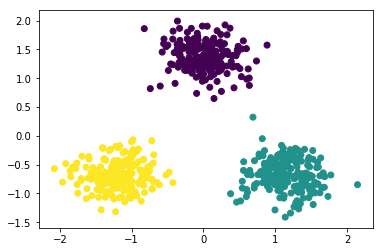

In [369]:
# adapted data generator code from lectures
def gen_gmm_data(n = 999, plot=False):
    # Fixing seed for repeatability
    np.random.seed(1)
    
    # Parameters of a normal distribuion
    mean_1 = [0, 4] ; mean_2 = [4, -4] ; mean_3 = [-4, -4]
    mean = [mean_1, mean_2, mean_3] ; cov = [[1, 0], [0, 1]]  
    
    # Setting up the class probabilities
    n_samples = n
    pr_class_1 = pr_class_2 = pr_class_3 = 1/3.0
    n_class = (n_samples * np.array([pr_class_1,pr_class_2, pr_class_3])).astype(int)
  
    # Generate sample data
    for i in range(3):
        x1,x2 = np.random.multivariate_normal(mean[i], cov, n_class[i]).T
        if (i==0):
            xs = np.array([x1,x2])
            cl = np.array([n_class[i]*[i]])
        else: 
            xs_new = np.array([x1,x2])
            cl_new = np.array([n_class[i]*[i]])
            xs = np.concatenate((xs, xs_new), axis = 1)
            cl = np.concatenate((cl, cl_new), axis = 1)
            
    # One hot encoding classes
    y = pd.Series(cl[0].tolist())
    y = pd.get_dummies(y).values 

    # Normalizing data (prevents overflow errors)     
    mu = xs.mean(axis = 1)
    std = xs.std(axis = 1)
    xs = (xs.T - mu) / std
    
    if plot:
        plt.scatter(xs[:,0], xs[:,1], c=np.argmax(y, axis=1))
    
    return xs, y, cl

# generate data with 600 observations
X, Y, cl = gen_gmm_data(600, True)

### 4.Fit your network using Gradient Descent. Keep track of the total Loss at each iteration and plot the result.

In [370]:
# Randomize X and Y
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.20, random_state=0)
print(train_X.shape, train_Y.shape, test_X.shape, test_Y.shape)

(480, 2) (480, 3) (120, 2) (120, 3)


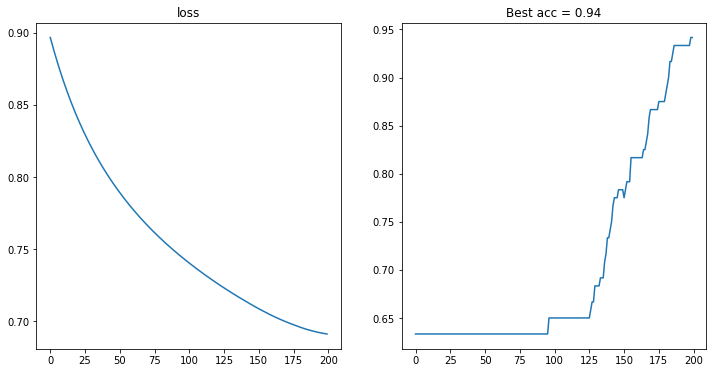

In [371]:
# --- Grad descent

def init_params(std = 1.0):
    
    W1 = std * np.random.randn(2, 3)
    B1 = np.zeros(3)
    W2 = std * np.random.randn(3, 2)
    B2 = np.zeros(2)
    V = std * np.random.randn(2, 3)
    C = np.zeros(3)
    
    return [W1, B1, W2, B2, V, C]
    
def update_params(parameters, grads, learning_rate):
    W1, B1, W2, B2, V, C = parameters
    d_W1, d_B1, d_W2, d_B2, d_V, d_C = grads
    
    W1 -= learning_rate * d_W1
    B1 -= learning_rate * d_B1
    W2 -= learning_rate * d_W2
    B2 -= learning_rate * d_B2
    V -= learning_rate * d_V
    C -= learning_rate * d_C
    
    return [W1, B1, W2, B2, V, C]

def fwd(X, parameters):
    W1, B1, W2, B2, V, C = parameters
    
    h1 = ReLU(np.dot(X, W1) + B1)      
    h2 = ReLU(np.dot(h1, W2) + B2)
    scores = np.dot(h2, V) + C
    
    outs = softmax(scores)
    
    return outs

def test_net(x, y, parameters):
    outs = fwd(x, parameters)
    preds = outs.argmax(axis=1)
    gts = y.argmax(axis=1)
    acc = (preds == gts).sum() * 1.0 / x.shape[0]
    return acc
    
def grad_descent(x, y, starting_point=None, iterations=200, learning_rate=.01):    
    parameters = init_params(1)
        
    losses = []
    results = []
    acces = []
    
    best_acc = -1
    best_params = None
    
    for i in range(iterations):
        outs, loss, grads = grad_f(x, y, parameters)
        parameters = update_params(parameters, grads, learning_rate)
        losses.append(loss)
        results.append(outs)
            
        acc = test_net(test_X, test_Y, parameters)
        acces.append(acc)
        if acc > best_acc:
            best_acc = acc
            best_params = parameters
        
    return acces, losses, best_params

acces, losses,parameters = grad_descent(train_X, train_Y)

plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.plot(losses)

plt.title('loss')
plt.subplot(1,2,2)
plt.title("Best acc = {:.2f}".format(max(acces)))
plt.plot(acces)

### 5.Repeat the exercise above using Momentum. Comment on whether your algorithm seems to converge more efficiently.

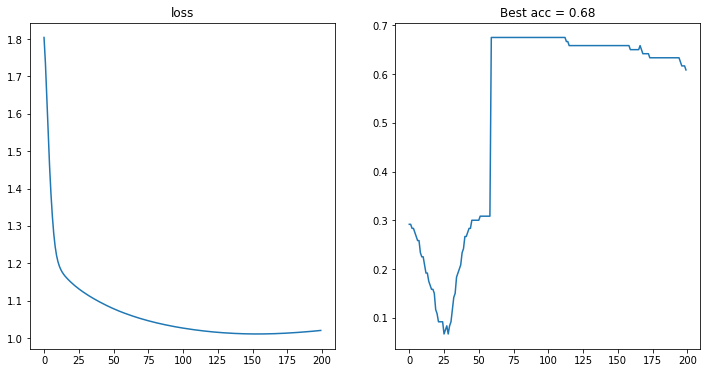

In [372]:
def momentum(x, y, starting_point=None, iterations=200, learning_rate=.01, momentum = .5):    
    parameters = init_params(1)
    velocitys = np.array([0] * len(parameters))
    
    losses = []
    results = []
    acces = []
    
    best_acc = -1
    best_params = None
    
    np.set_printoptions(precision=1)
    
    for i in range(iterations):
        outs, loss, grads = grad_f(x, y, parameters)
        # Here we add a momentum for every variable to accelarate convergence
        velocitys = velocitys * momentum - np.array(grads) * learning_rate 
        parameters = list(np.array(parameters) + velocitys)
        
        losses.append(loss)
        results.append(outs)
            
        acc = test_net(test_X, test_Y, parameters)
        acces.append(acc)
        if acc > best_acc:
            best_acc = acc
            best_params = parameters
        
    return acces, losses, best_params

acces, losses,parameters = momentum(train_X, train_Y)

plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.plot(losses)

plt.title('loss')
plt.subplot(1,2,2)
plt.title("Best acc = {:.2f}".format(max(acces)))
plt.plot(acces)